# BUSINESS UNDERSTANDING

## Overview

This project aims to build a predictive model to identify customers at risk of leaving SyriaTel('churn'), so the company can act early and reduce revenue loss.
Churn means customers stopping their service soon and we're building a simple yes/no classifier to spot it early. 
The goal is to help the business reduce revenue loss by keeping more customers.

## Problem statement

SyriaTel, a telecommunication company is losing revenue when customers stop using its services (“churn”). Since retaining existing customers is more cost-effective than acquiring new ones, predicting churn early can help the company 
act with foresight by spotting customers who might leave, SyriaTel can create special plans to keep them and reduce revenue loss.

## Business Objective

The goal of this project is to find out why SyriaTel customers leave, predict which customers are likely to leave next, and provide actionable insights to help the company keep more customers and reduce revenue loss.

# DATA UNDERSTANDING

The dataset being used for in this project is from Kaggle. It consist of 21 columns and 3,333 rows. The dataset consist of float, integer and object
data types. 
The columns names are:
* state- "The state where the customer lives"
* account length- "How long (in days) the customer has had their account "                                                                                    
* area code- "The customer's phone area code"
* phone number- "Customer's phone number"
* international plan-"Whether the customer has an international calling plan ("Yes" & "No")"
* voice mail plan- "Whether the customer has a voicemail plan ("Yes" & "No")" 
* number vmail messages- ""The number of voicemail messages the customer has"
* total day minutes- "Total number of minutes customer spend on calls during the day" 
* total day calls- "Total number of calls the customer make during the day"
* total day charge- "How much the customer was charged for daytime calls"
* total eve minutes- "Total minutes customer spend on evening calls"
* total eve calls- "Total number of calls made by customer during the evening"
* total eve charge- "How much the customer was charged for evening calls"
* total night minute- "Total minutes the customer spend on night calls"
* total night calls- "Total night calls made by the customer"
* total night charge- "How much the customer was charged for night calls"
* total intl minutes- "Total minutes spent on international calls"
* total intl calls- "Total number of international calls made"
* total intl charge- "How much the customer was charged for international calls"
* customer service calls- "Number of times the customer called customer service"
* churn- "Whether the customer left the company or not ("True" & "False")"
* **The target column is churn**.
                                                                                         

# DATA PREPARATION

In [57]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Loading the data
df = pd.read_csv("bigml_59c28831336c6604c800002a.xls")
df.head(7)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


In [59]:
# checking the shape of dataset
df.shape

(3333, 21)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [61]:
# Checking null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [62]:
# checking duplicates
df.duplicated().sum()

0

* There are no duplicate records.
* There are no missing values in the dataset.
* There are  21 columns and 3,333 rows in the dataset
* There are 4 object columns, 8 integer columns, 8 float columns and 1 bool column

## Exploratory Data Analysis(EDA)

In [63]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [64]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

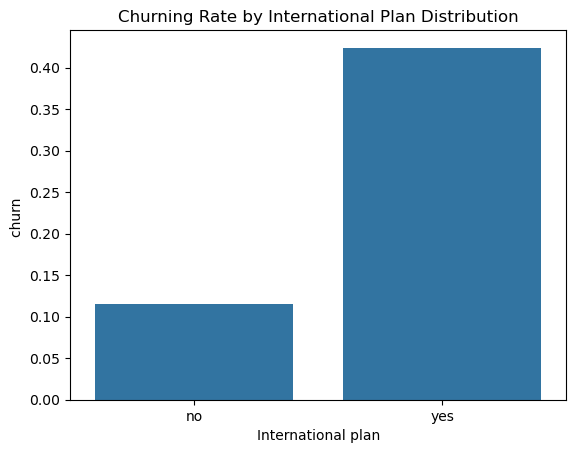

In [65]:
# Visualizing Churning rate by international plan
churn_by_international_plan = df.groupby("international plan")["churn"].mean().reset_index()
sns.barplot(data=churn_by_international_plan, x="international plan", y="churn" )
plt.title("Churning Rate by International Plan Distribution")
plt.xlabel("International plan")
plt.ylabel("churn ")
plt.show()


* **Customers with international plans tend to churn more compared to customers without international plan.**


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2372\2195608309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_by_customer_service_calls, x="customer service calls", y="churn", palette="viridis")


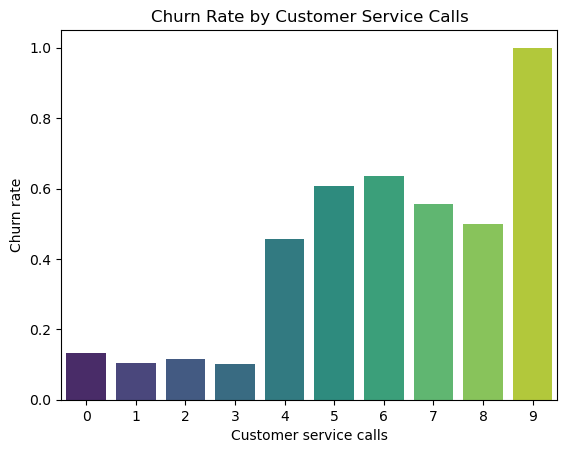

In [66]:
# Visualizing Churn rate by customer service calls
churn_by_customer_service_calls=df.groupby("customer service calls")["churn"].mean().reset_index()
sns.barplot(data=churn_by_customer_service_calls, x="customer service calls", y="churn", palette="viridis")
plt.title("Churn Rate by Customer Service Calls")
plt.xlabel("Customer service calls")
plt.ylabel("Churn rate")
plt.show()

* **From the distribution, customers with high service calls (9) have an increased rate of churning.**

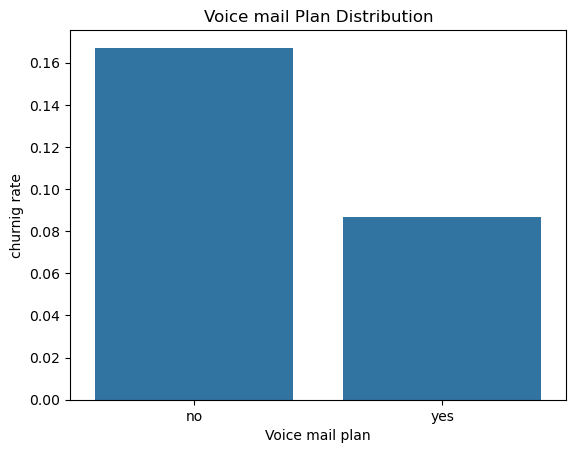

In [67]:
# Looking at voice mail plan column to understand its distribution
churns_by_voice_mail_plan =df.groupby("voice mail plan")["churn"].mean().reset_index()
sns.barplot( data=churns_by_voice_mail_plan, x="voice mail plan", y="churn" )
plt.title("Voice mail Plan Distribution")
plt.xlabel("Voice mail plan")
plt.ylabel("churnig rate")
plt.show()

* Customers without voice mail have an increased churn rate compared to customers with voice mail

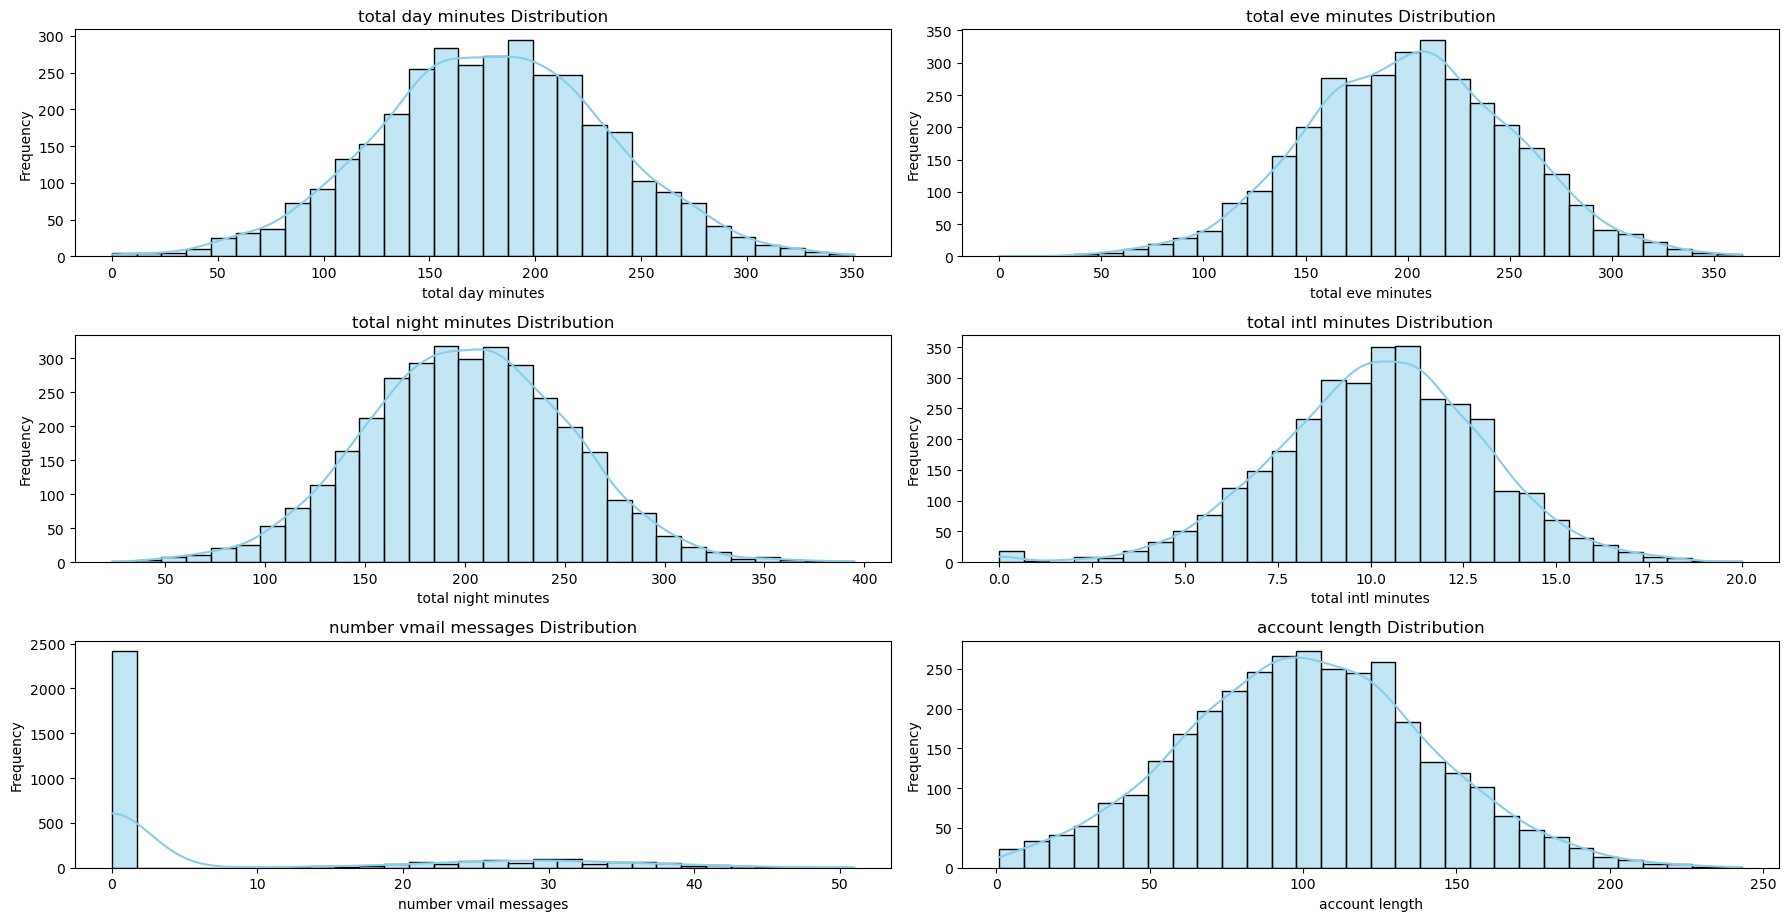

In [68]:
# visualize the distribution of numeric features
numeric_features = [
    'total day minutes',
    'total eve minutes',
    'total night minutes',
    'total intl minutes',
    'number vmail messages',
    'account length',
]

plt.figure(figsize=(18, 15))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[feature], bins=30, kde=True, color="skyblue")
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [69]:
# Convert churn to binary (0/1)
df["churn"] = df["churn"].astype(int)
df["churn"].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [70]:
# correlation with churn on numeric features
df.corr(numeric_only=True)["churn"]

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

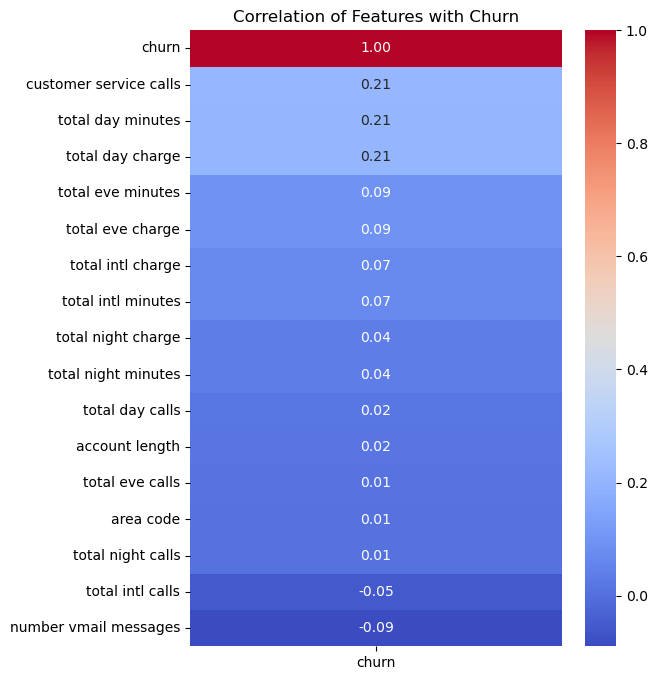

In [71]:
# Visualizing correlation with churn
plt.figure(figsize=(6, 8))
sns.heatmap(
    df.corr(numeric_only=True)[['churn']].sort_values(by='churn', ascending=False),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Correlation of Features with Churn")
plt.show()


**Inferences**
  
The features with a positive correlation to churn are:
1. Customer service calls (0.21-"weak positive"), meaning customers who call customer service more often are more likely to churn.
2. Total day minutes (0.21-"weak positive"), meaning customers who spend more minutes on calls during the day are more likely to churn.
3. Total day charge-0.21

Other features like (total intl calls, number vmail messages) have a negative correlations to churn.



* To avoid causing multicollinearity we drop either Total day minutes or Total day charge because they carry almost the same information.

In [72]:
# dropping irrelevant columns
df=df.drop(columns= ["total day charge", "total eve charge", "total night charge", "total intl charge", "phone number", "state", "area code"])
df.dtypes

account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                       int32
dtype: object

In [73]:
numeric_features=[
    "account length", "number vmail messages", "total day calls", "total eve calls", "total night calls", "total intl calls", 
    "customer service calls", "total intl minutes", "total night minutes", "total day minutes", "total eve minutes"
                 ]
categorical_features=["international plan", "voice mail plan"]

## Modeling

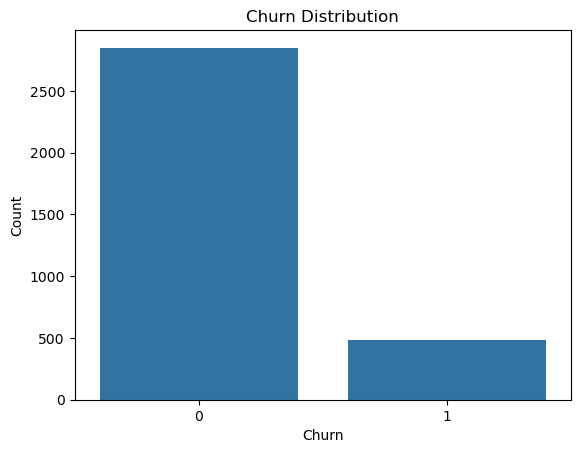

In [74]:
# Looking at the target column to understand its distribution and characteristic
churn_counts = df["churn"].value_counts()
sns.barplot( data=churn_counts)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

* **The target variable "churn" is imbalanced with many "non chuners" values compared to "chuners" to fix this we should scale the data**

* **Since the target feature (churn) is binary this is a classification problem so we try logistic regression** 

<Axes: xlabel='customer service calls', ylabel='churn'>

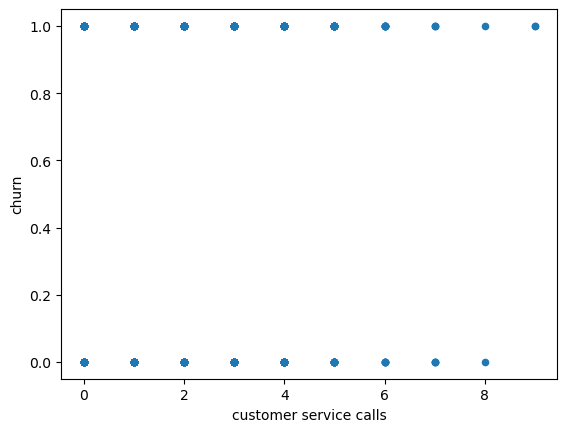

In [75]:
# plot churn with the most correlated feature( customer service calls)
df.sample(2000, random_state=42).plot.scatter(x="customer service calls", y="churn")

In [76]:
df.shape

(3333, 14)

In [77]:
# one hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [78]:
X=df_encoded.drop(columns=["churn"])
y=df_encoded["churn"]

# Perfom a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
# feature scaling
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# checking at the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0: 2280, 1: 386})


In [81]:
# Applying smote to handle class imbalance
smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0: 2280, 1: 2280})


* **Applying SMOTE to the training set generates new churn examples to balance the dataset**

In [82]:
# importing library
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(max_iter=1000, random_state=42)

In [83]:
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [84]:
y_pred=model.predict(X_test_scaled)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7616191904047976

Logistic Regression Confusion Matrix:
 [[438 132]
 [ 27  70]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       570
           1       0.35      0.72      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



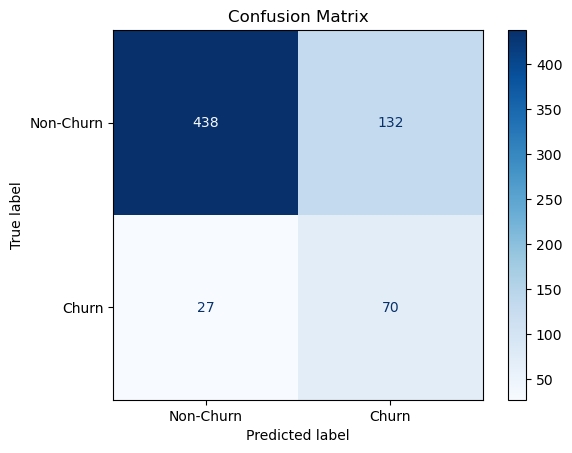

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, display_labels=["Non-Churn", "Churn"], cmap="Blues")
                                      
plt.title("Confusion Matrix")
plt.show()

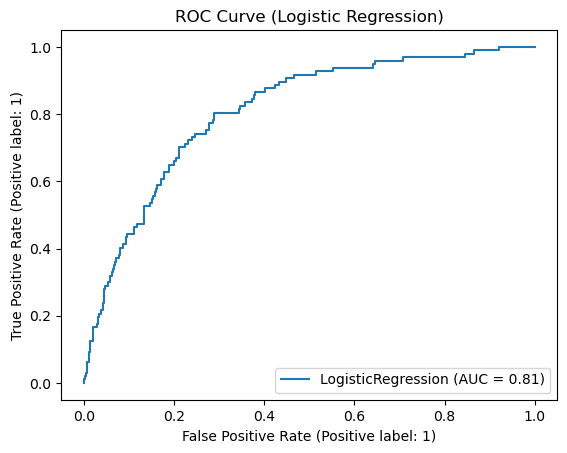

In [87]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve 
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve (Logistic Regression)")
plt.show()


**Logistic regression Evaluation**

Accuracy-0.762 (76% accuracy)

Class 0 (non_churners)
1. Precision = 0.94, The model is right 94% of the time  it predicts if a customer will not churn.
2. Recall = 0.77, The model correctly predicts 77% of the non-chuners.
3. F1-score = 0.85, There is a stong balance between precision and recall for class 0 (non-churn)

Class 1 (chuners)
1. Precision = 0.35, When the model predict chuners, its percentage of being accurate is 35%
2. Recall = 0.72, The model detects 72% of actual chuners.
3. F1-score = 0.47

Confusion matrix
* 438 True Negatives(TN) Correctly predicted non-churners
* 132 False Positive(FP) Predicted churn that is non-churn
* 27 False Negative(FN) Predicted non-churn that is churn
* 70 True Positives(TP) Correctly predicted chuners

**Conclusion**

The model attained a 76%  accuracy. It correctly predicts most customers likely to churn(72% recall). 
However, there are many false positive (precision 35%).
                                                                                                                  


* AUC of 0.81 indicates a strong predictive power though not perfect. 
* The model works well when we want to identify customers who are likely to leave, and not making too many mistakes of 
wrongly predicting loyal customers as churners.

In [88]:
# Building a Decision tree classifier and compare if our model performance will improve

from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42,
    class_weight="balanced", # balances the churners and non-churners classes
    criterion="gini", # measure node impurity
    max_depth=5, # prevents overfitting
    min_samples_split=2, # Prevents splitting nodes with very few samples
    min_samples_leaf=1, # Ensures leaves have enough samples
    ccp_alpha=0.01, # pruning the tree to reduce overfitting
    splitter="best" # chooses the best feature to split 
)
    
# Training on balanced data (after SMOTE)
dt_model.fit(X_train_res, y_train_res)


DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       random_state=42)

In [89]:
# Prediction
y_pred= dt_model.predict(X_test_scaled)

In [90]:

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Confusion Matrix:
 [[507  63]
 [ 23  74]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       570
           1       0.54      0.76      0.63        97

    accuracy                           0.87       667
   macro avg       0.75      0.83      0.78       667
weighted avg       0.90      0.87      0.88       667



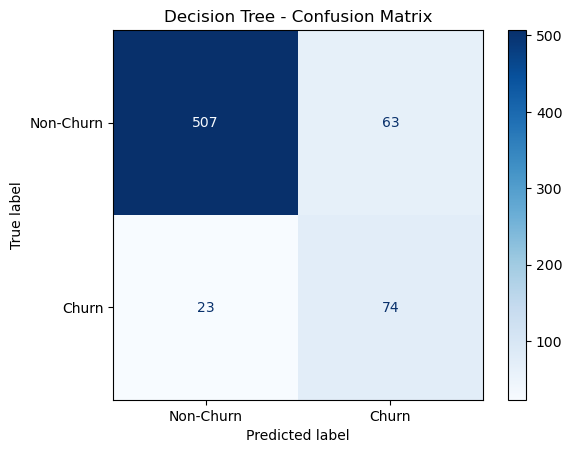

In [91]:
# Ploting confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator( dt_model, X_test_scaled, y_test, display_labels=["Non-Churn", "Churn"], cmap="Blues")

plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [92]:
# Calculate accuracy
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :87.10644677661169


In [93]:
from sklearn.metrics import roc_auc_score
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1] 
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)
print("Decision Tree AUC:", round(roc_auc, 2))

Decision Tree AUC: 0.81


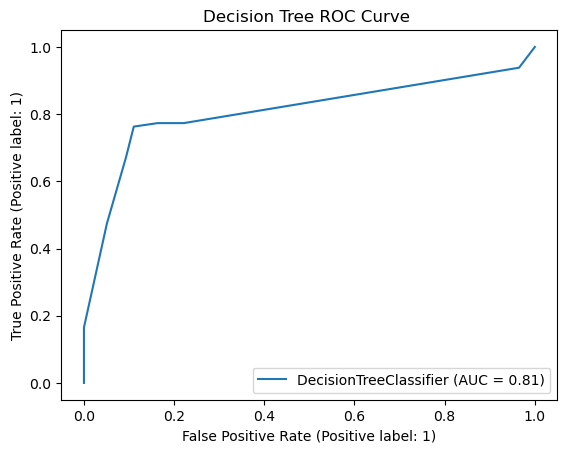

In [94]:
from sklearn.metrics import RocCurveDisplay

# ROC curve plot
RocCurveDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.title("Decision Tree ROC Curve ")
plt.show()


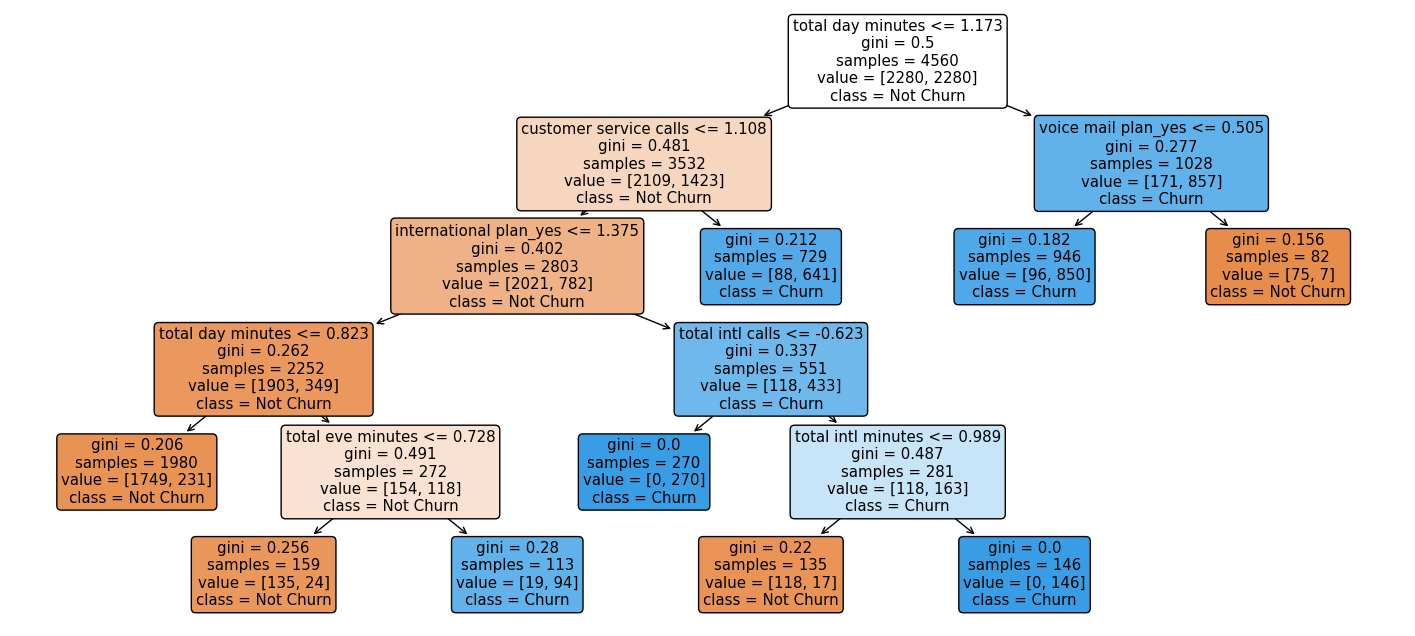

In [95]:
from sklearn import tree
# plot decision tree
plt.figure(figsize=(18, 8))
tree.plot_tree(dt_model, max_depth=5, feature_names=X.columns, class_names=["Not Churn", "Churn"], filled=True, rounded=True)

plt.show()

* **Decision tree Evaluation**
Accuracy of 87%

Class 0 (non-churners)
* Precision-0.94, The model is right 94% of the time it predicts if a customer will not churn
* Recall-0.86, The model correctly predicts 89% of the actual non-chuners(customers who stayed).
* f1-score-0.92 , stronger balance between recall and precision for the decision tree model compared to logistic regression model

Class 1(Churners)
* Precision-0.54, When the model predicts churners it has a 54% chance of being accurate
* Recall-0.76, The model correctly predicts 76% of actual chuners 

**Conlusion**
* Compared to the logistic regression model the Decision Tree model shows an improved the recall for the churn class, indicating it captures a higher
proportion of actual chuners.

* **OVERALL OBSERVATION**
1. Customers who frequently contact customers service are more likely to churn and customers with few customer service calls are less likely to churn,
this may indicate dissatistaction and unhappines from the customers.

3. Customers with high customer service calls combined with high total daytime minutes calls  increases the probability of churn.

4. Customers without voice mail plan and high daytime minutes are more likely to churn and viceversa, customers with voice mail plan and high daytime
minutes are mostly likely to stay(not churn)

5. Customers with international plan and high daytime minutes are likely to churn.

**RECCOMENDATIONS**
1. Customers with many customer service calls might signal dissatisfaction so the company could review the customer service workflow to resolve issues.
2. The company could come up with a retention strategy for customers with international plan who spend more minutes on calls during the day
since it is linked to churn.
3. The company could promote voicemail plans for regular daytime callers since customers who spend more minutes on calls and without voicemail plans are
asscociated with churn.

In [ ]:
#df.groupby('churn')['total day minutes'].mean()
